**Data Understanding**. Load the dataset data. Analyze the fields present. Analyze the number of missing values for each field

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/AtomSpace/final project data science/"
events = pd.read_csv(path+"events.csv")
events.info()
events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


There are missing data in "Country Code" and "Units Sold" fields

In [3]:
countries = pd.read_csv(path+"countries.csv")
countries.info()
countries.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [4]:
missing = countries[countries['alpha-2'].isna()]
print(missing)
missing = countries[countries['region'].isna()] #it was Antarctica
print(missing)

        name alpha-2 alpha-3  region          sub-region
153  Namibia     NaN     NAM  Africa  Sub-Saharan Africa
         name alpha-2 alpha-3 region sub-region
8  Antarctica      AQ     ATA    NaN        NaN


In [5]:
# Fill 'region' with 'name' where 'region' is null (NaN)
countries['region'] = countries['region'].fillna(countries['name'])
countries['sub-region'] = countries['sub-region'].fillna(countries['name'])

In [54]:
print(countries['region'].unique())
print(countries['sub-region'].unique())

['Asia' 'Europe' 'Africa' 'Oceania' 'Americas' 'Antarctica']
['Southern Asia' 'Northern Europe' 'Southern Europe' 'Northern Africa'
 'Polynesia' 'Sub-Saharan Africa' 'Latin America and the Caribbean'
 'Antarctica' 'Western Asia' 'Australia and New Zealand' 'Western Europe'
 'Eastern Europe' 'Northern America' 'South-eastern Asia' 'Eastern Asia'
 'Melanesia' 'Micronesia' 'Central Asia']


In [6]:
products = pd.read_csv(path+"products.csv")
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


**Data Cleaning.**

In [7]:
missing_units_sold = events[events['Units Sold'].isna()]
print("Rows with missing 'Units Sold':")
print(missing_units_sold)

Rows with missing 'Units Sold':
      Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
183  217165648  5/20/2014   6/8/2014              M          ESP        8875   
319  309655511   5/5/2014  5/21/2014              C          HRV        3127   

    Sales Channel  Units Sold  Unit Price  Unit Cost  
183       Offline         NaN      421.89     364.69  
319       Offline         NaN       81.73      56.67  


In [8]:
filtered_products = products[products['id']==8875]
print(filtered_products)
filtered_products = products[products['id']==3127]
print(filtered_products)

     id item_type
8  8875      Meat
      id      item_type
11  3127  Personal Care


**Exploratory Data Analysis.** Firstly merge tables

In [9]:
sales = pd.merge(events, products, left_on='Product ID', right_on='id')
countries_selected = countries[['alpha-3', 'name', 'region', 'sub-region']].rename(columns={'name': 'Country'})
sales = pd.merge(sales, countries_selected, left_on='Country Code', right_on='alpha-3')
sales = sales.drop(columns=['id','Product ID','Country Code','alpha-3'])
sales.head()

,Order ID,Order Date,Ship Date,Order Priority,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,Country,region,sub-region
0,100640618,10/8/2014,10/18/2014,M,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,445952498,6/6/2015,7/7/2015,C,Offline,6109.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
2,481114327,11/4/2015,11/24/2015,M,Online,1276.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
3,645701968,6/20/2013,7/21/2013,L,Offline,6416.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
4,149274003,4/29/2013,5/29/2013,C,Offline,2350.0,668.27,502.54,Household,Norway,Europe,Northern Europe


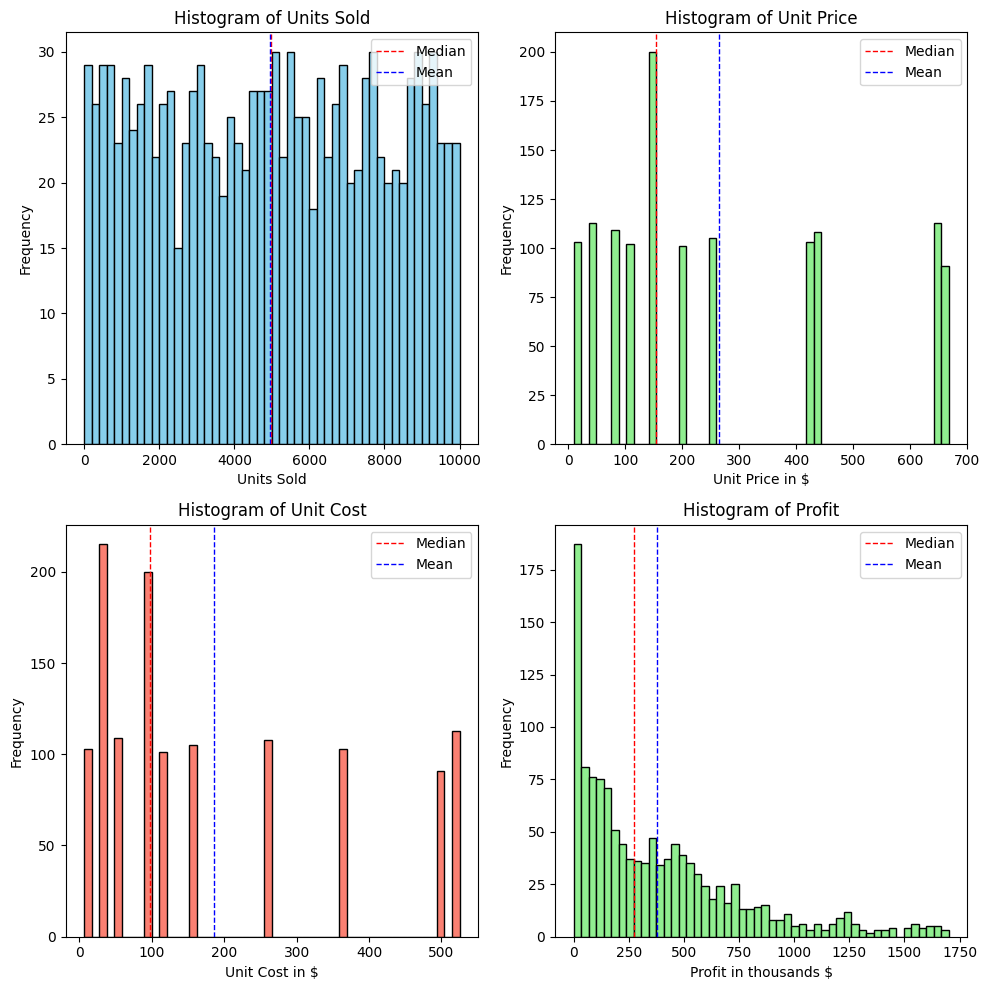

In [10]:
sales['Profit'] = (sales['Unit Price'] - sales['Unit Cost']) * sales['Units Sold']/1e3

# Calculate medians
median_units_sold = sales['Units Sold'].median()
median_unit_price = sales['Unit Price'].median()
median_unit_cost = sales['Unit Cost'].median()
median_profit = sales['Profit'].median()

mean_units_sold = sales['Units Sold'].mean()
mean_unit_price = sales['Unit Price'].mean()
mean_unit_cost = sales['Unit Cost'].mean()
mean_profit = sales['Profit'].mean()

# Create histograms with median lines
plt.figure(figsize=(10,10))

# Histogram for 'Units Sold'
plt.subplot(2, 2, 1)
plt.hist(sales['Units Sold'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.axvline(median_units_sold, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_units_sold, color='blue', linestyle='dashed', linewidth=1)
plt.title('Histogram of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.legend(['Median', 'Mean'])

# Histogram for 'Unit Price'
plt.subplot(2, 2, 2)
plt.hist(sales['Unit Price'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.axvline(median_unit_price, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_unit_price, color='blue', linestyle='dashed', linewidth=1)
plt.title('Histogram of Unit Price')
plt.xlabel('Unit Price in $')
plt.ylabel('Frequency')
plt.legend(['Median', 'Mean'])

# Histogram for 'Unit Cost'
plt.subplot(2, 2, 3)
plt.hist(sales['Unit Cost'].dropna(), bins=50, color='salmon', edgecolor='black')
plt.axvline(median_unit_cost, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_unit_cost, color='blue', linestyle='dashed', linewidth=1)
plt.title('Histogram of Unit Cost')
plt.xlabel('Unit Cost in $')
plt.ylabel('Frequency')
plt.legend(['Median', 'Mean'])

# Histogram for 'Profit'
plt.subplot(2, 2, 4)
plt.hist(sales['Profit'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.axvline(median_profit, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_profit, color='blue', linestyle='dashed', linewidth=1)
plt.title('Histogram of Profit')
plt.xlabel('Profit in thousands $')
plt.ylabel('Frequency')
plt.legend(['Median', 'Mean'])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [62]:
print(sales['Order Priority'].unique())

['M' 'C' 'L' 'H']


In [11]:
sales['Order Priority'] = sales['Order Priority'].replace('M ', 'M')
sales['Order Priority'] = sales['Order Priority'].replace(' C', 'C')

In [64]:
print(sales['Sales Channel'].unique())

['Online' 'Offline']


In [12]:
sales['Sales Channel'] = sales['Sales Channel'].replace('online','Online')

In [65]:
print(sales['region'].unique())

['Europe' 'Asia']


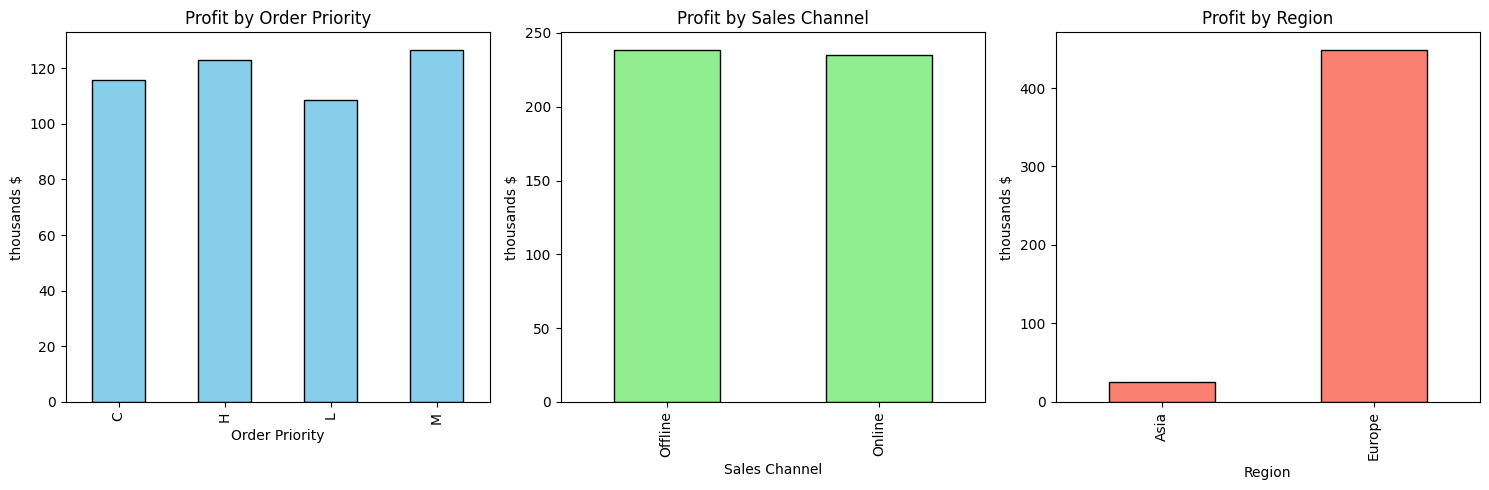

In [13]:
# Group by 'Order Priority', 'Sales Channel', and 'region' and sum the 'Profit'
profit_by_order_priority = sales.groupby('Order Priority')['Profit'].sum()/1e3
profit_by_sales_channel = sales.groupby('Sales Channel')['Profit'].sum()/1e3
profit_by_region = sales.groupby('region')['Profit'].sum()/1e3

# Set up the figure size
plt.figure(figsize=(15, 5))

# Bar plot for 'Order Priority'
plt.subplot(1, 3, 1)
profit_by_order_priority.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('thousands $')

# Bar plot for 'Sales Channel'
plt.subplot(1, 3, 2)
profit_by_sales_channel.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Profit by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('thousands $')

# Bar plot for 'Region'
plt.subplot(1, 3, 3)
profit_by_region.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('thousands $')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


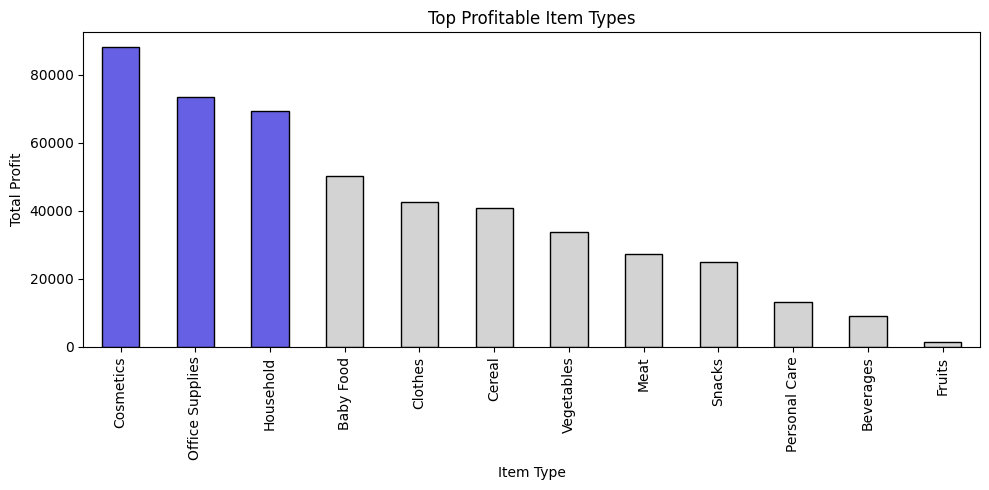

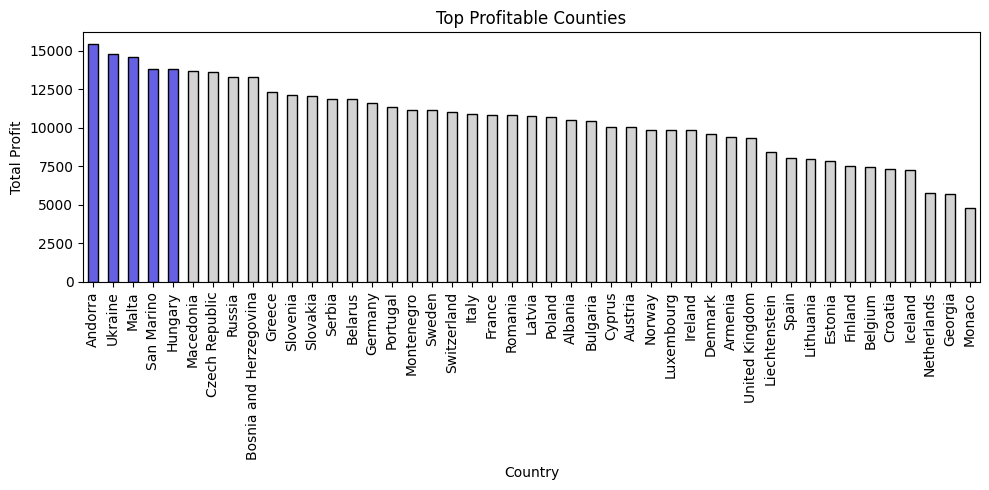

In [14]:
# Group by 'item_type' and 'County', then sum the 'profit'
profit_by_item_type = sales.groupby('item_type')['Profit'].sum().sort_values(ascending=False)
profit_by_county = sales.groupby('Country')['Profit'].sum().sort_values(ascending=False)

# Function to create the bar diagram with first 5 categories in color and the rest in light grey
def plot_sorted_bars(profit_data, title, xlabel,top=5):
    # Set up colors: first 5 in blue, the rest in light grey
    colors = ['#6660e4' if i < top else 'lightgrey' for i in range(len(profit_data))]

    # Create the bar plot
    profit_data.plot(kind='bar', color=colors, figsize=(10, 5), edgecolor='black')

    # Add titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Total Profit')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Plot for 'item_type'
plot_sorted_bars(profit_by_item_type, 'Top Profitable Item Types', 'Item Type',3)

# Plot for 'County'
plot_sorted_bars(profit_by_county, 'Top Profitable Counties', 'Country')


In [115]:
pip install geopandas matplotlib


In [15]:
import geopandas as gpd
import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'
world = gpd.read_file(path+'ne_110m_admin_0_countries.shp')
print(world.head())

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

In [117]:
pip install geodatasets

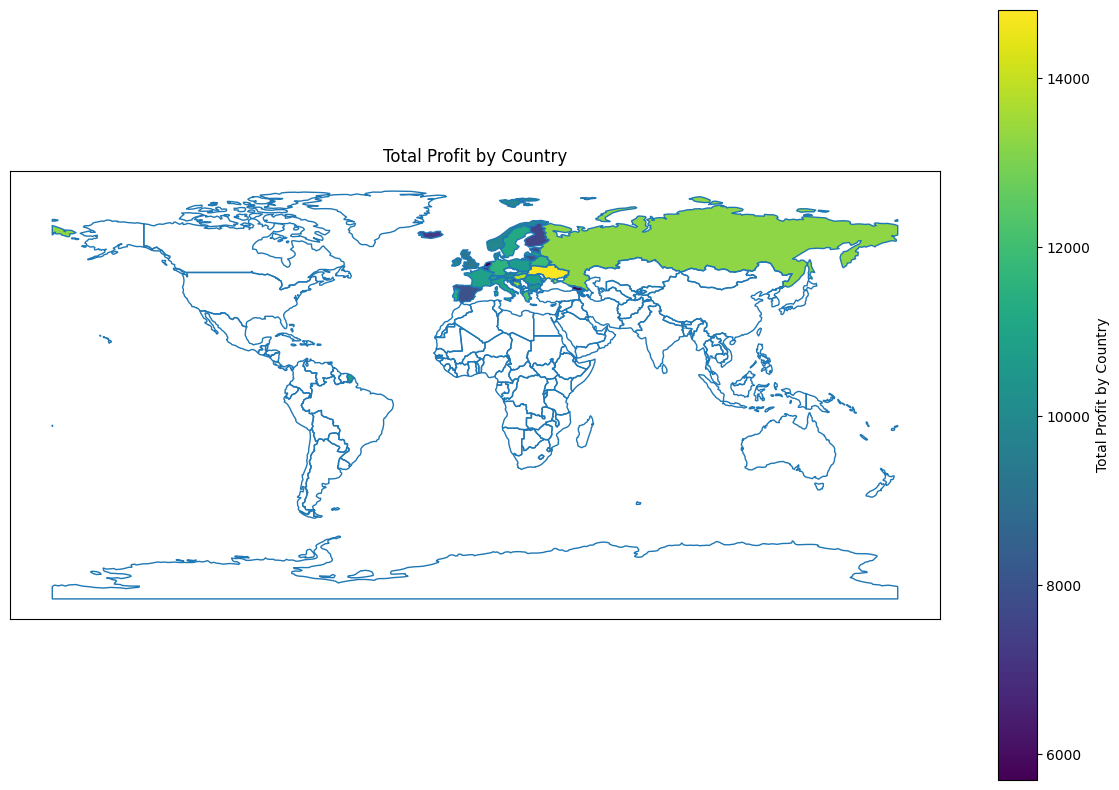

In [16]:
profit_by_country = sales.groupby('Country')['Profit'].sum().reset_index()
world = gpd.read_file(path+'ne_110m_admin_0_countries.shp')
merged = world.merge(profit_by_country, left_on='ADMIN', right_on='Country', how='left')

fig, ax = plt.subplots(1,1,figsize=(15,10))
world.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='Profit', ax=ax, legend=True,
            legend_kwds={'label': "Total Profit by Country",
                         'orientation': "vertical"})
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

plt.title("Total Profit by Country")
plt.show()

**ABC analysis using Pareto's 80/20 principle.**

In [22]:
profit_by_type = sales.groupby('item_type')['Profit'].sum().reset_index()
profit_by_type =profit_by_type.sort_values(by='Profit', ascending=False)
profit_by_type['Cumulative Profit'] = profit_by_type['Profit'].cumsum()
profit_by_type['Cumulative Percentage'] = (profit_by_type['Cumulative Profit'] / profit_by_type['Profit'].sum()) * 100
print(profit_by_type)

          item_type       Profit  Cumulative Profit  Cumulative Percentage
4         Cosmetics  88010.90756        88010.90756              18.579107
8   Office Supplies  73411.97625       161422.88381              34.076379
6         Household  69160.45484       230583.33865              48.676154
0         Baby Food  50256.04290       280839.38155              59.285207
3           Clothes  42544.74672       323384.12827              68.266405
2            Cereal  40774.96494       364159.09321              76.874002
11       Vegetables  33617.35630       397776.44951              83.970628
7              Meat  27297.72760       425074.17711              89.733179
10           Snacks  25012.66194       450086.83905              95.013353
9     Personal Care  13290.82160       463377.66065              97.819046
1         Beverages   9051.33906       472428.99971              99.729784
5            Fruits   1280.03535       473709.03506             100.000000


In [23]:
# Define the ABC classification function
def classify_abc(cum_percentage):
    if cum_percentage <= 80:
        return 'A'
    elif cum_percentage <= 95:
        return 'B'
    else:
        return 'C'

# Apply the classification to each product
profit_by_type['ABC Category'] = profit_by_type['Cumulative Percentage'].apply(classify_abc)

# Display the result
print(profit_by_type)


          item_type       Profit  Cumulative Profit  Cumulative Percentage  \
4         Cosmetics  88010.90756        88010.90756              18.579107   
8   Office Supplies  73411.97625       161422.88381              34.076379   
6         Household  69160.45484       230583.33865              48.676154   
0         Baby Food  50256.04290       280839.38155              59.285207   
3           Clothes  42544.74672       323384.12827              68.266405   
2            Cereal  40774.96494       364159.09321              76.874002   
11       Vegetables  33617.35630       397776.44951              83.970628   
7              Meat  27297.72760       425074.17711              89.733179   
10           Snacks  25012.66194       450086.83905              95.013353   
9     Personal Care  13290.82160       463377.66065              97.819046   
1         Beverages   9051.33906       472428.99971              99.729784   
5            Fruits   1280.03535       473709.03506             

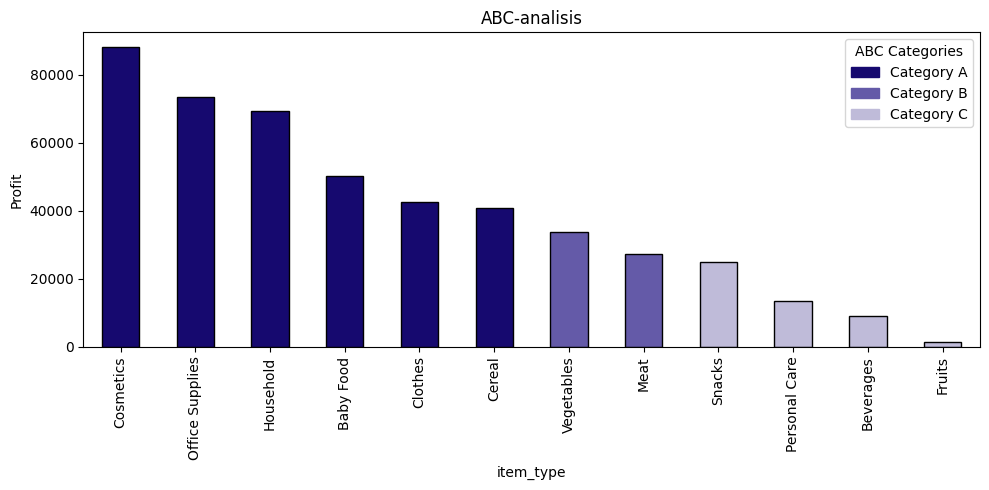

In [34]:
import matplotlib.patches as mpatches

color_mapping = {'A': '#16096f', 'B': '#645aa8', 'C': '#bfbbd9'}
colors = profit_by_type['ABC Category'].map(color_mapping)
profit_by_type.plot(kind='bar',x='item_type', y='Profit', color=colors, figsize=(10, 5), edgecolor='black')
plt.title('ABC-analisis')
plt.xlabel('item_type')
plt.ylabel('Profit')
legend_patches = [mpatches.Patch(color=color_mapping['A'], label='Category A'),
                  mpatches.Patch(color=color_mapping['B'], label='Category B'),
                  mpatches.Patch(color=color_mapping['C'], label='Category C')]

plt.legend(handles=legend_patches, title="ABC Categories")
plt.tight_layout()
plt.show()